In [345]:
# Import necesary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [347]:
# Load data set

df= pd.read_csv(r"C:\Users\User\Downloads\Dataset_ecommerce (1).csv")

In [348]:
df.head(5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [351]:
# Descriptive statistics of the data

df.describe(include = "all")

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,2011-10-31 14:41:00,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


In [352]:
# Checking for missing values

df.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [355]:
# drop missing values

df.dropna(inplace= True)

In [357]:
df.isnull().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [359]:
# Checking for information on the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   InvoiceDate  406829 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    406829 non-null  object 
 4   Description  406829 non-null  object 
 5   Quantity     406829 non-null  int64  
 6   UnitPrice    406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [361]:
# Convert invoice date to datetime format

df["InvoiceDate"]= pd.to_datetime(df["InvoiceDate"])

## EDA

In [364]:
# Analysis by country

quantity_by_country= df.groupby(["Country"])["Quantity"].sum().reset_index()
quantity_by_country= quantity_by_country.sort_values("Quantity", ascending= False).reset_index()
quantity_by_country.head(9)

,index,Country,Quantity
0,23,Togo,741223
1,20,South Africa,740589
2,4,Cote d'Ivoire,740229
3,15,Nigeria,739708
4,9,Libya,739206
5,1,Benin,738133
6,27,Zimbabwe,737522
7,19,Somalia,736219
8,0,Algeria,736181


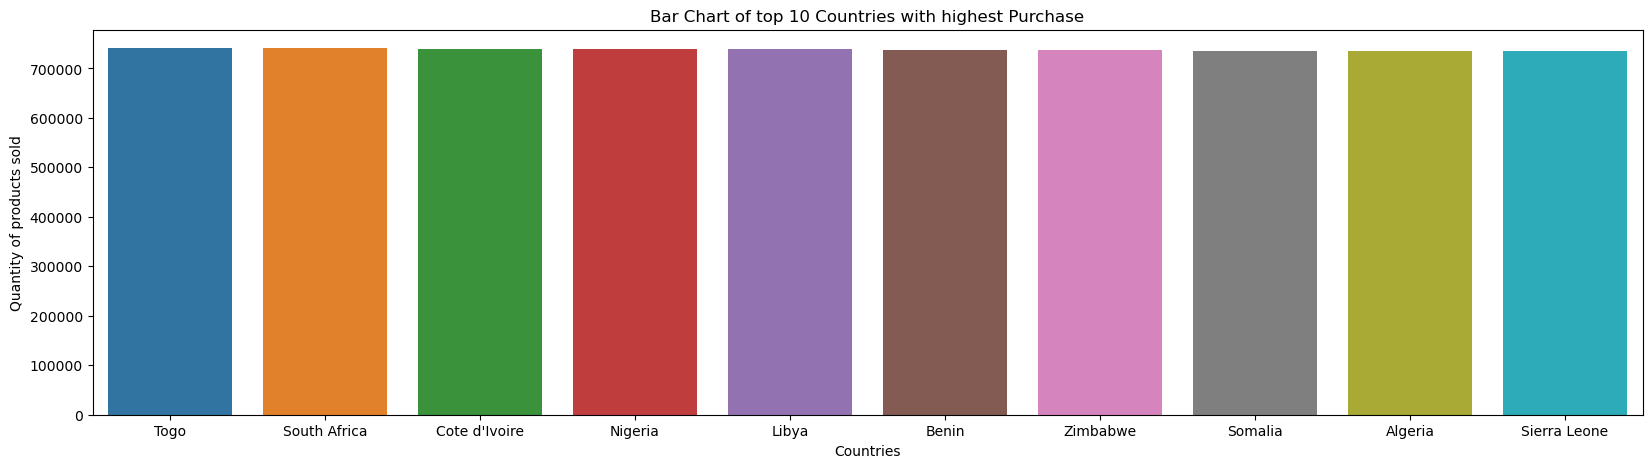

In [366]:
# Visualizing the top 10 countries with most quantities sold

top_10_countries= quantity_by_country.head(10)

plt.figure(figsize=(20,5))
ax= sns.barplot(x= 'Country', y= 'Quantity', data= top_10_countries)

plt.xlabel('Countries')
plt.ylabel('Quantity of products sold')
plt.title('Bar Chart of top 10 Countries with highest Purchase')
plt.show()

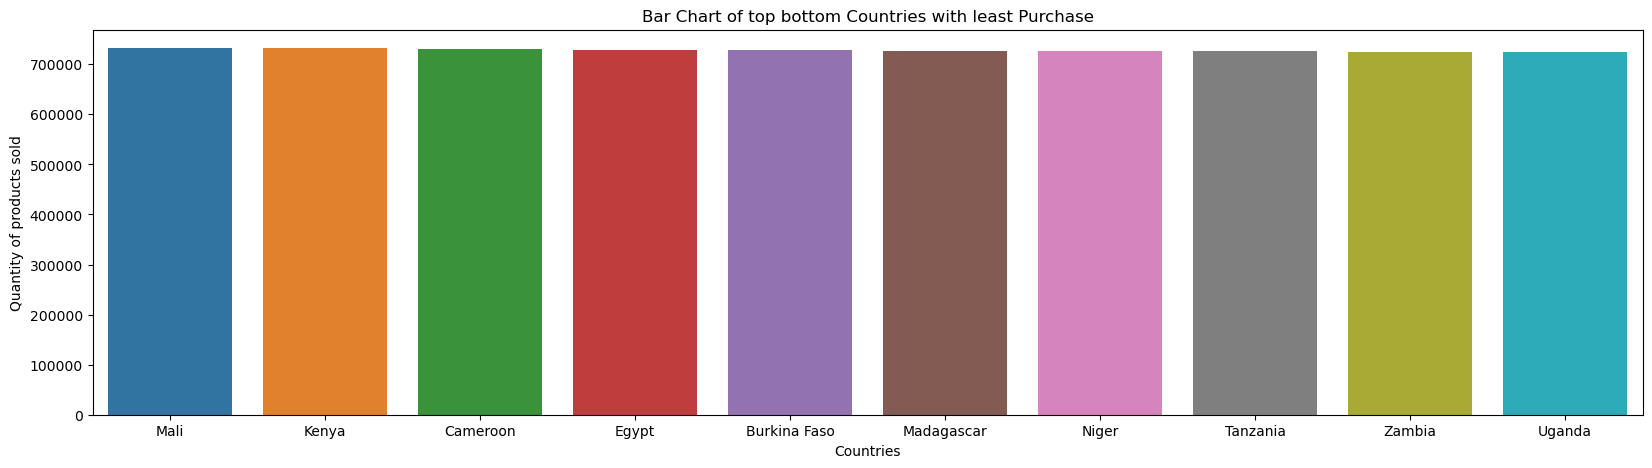

In [368]:
# Visualizing countries with least quantities sold

least_10_countries= quantity_by_country.tail(10)

plt.figure(figsize=(20,5))
ax= sns.barplot(x= 'Country', y= 'Quantity', data= least_10_countries)

plt.xlabel('Countries')
plt.ylabel('Quantity of products sold')
plt.title('Bar Chart of top bottom Countries with least Purchase')
plt.show()

In [370]:
# Analysis of countries and number of cutomers

country_to_customer= df.groupby(['Country'])['CustomerID'].nunique().reset_index()
country_to_customer= country_to_customer.sort_values('CustomerID', ascending= False).reset_index()
country_to_customer.head(3)

,index,Country,CustomerID
0,13,Mozambique,3072
1,1,Benin,3054
2,23,Togo,3053


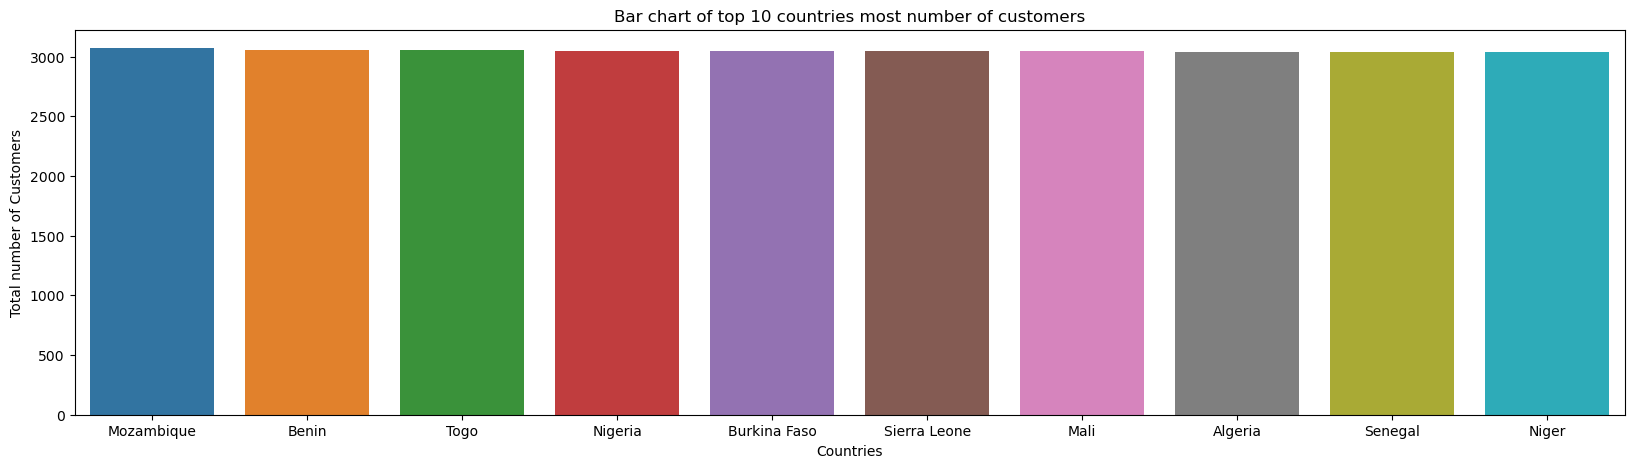

In [372]:
# Drawing a plot of the top 10 countries with most number of Customers

top_countries_to_customer= country_to_customer.head(10)

plt.figure(figsize=(20,5))
sns.barplot(x='Country', y= 'CustomerID', data= top_countries_to_customer)
plt.xlabel('Countries')
plt.ylabel('Total number of Customers')
plt.title('Bar chart of top 10 countries most number of customers')
plt.show()

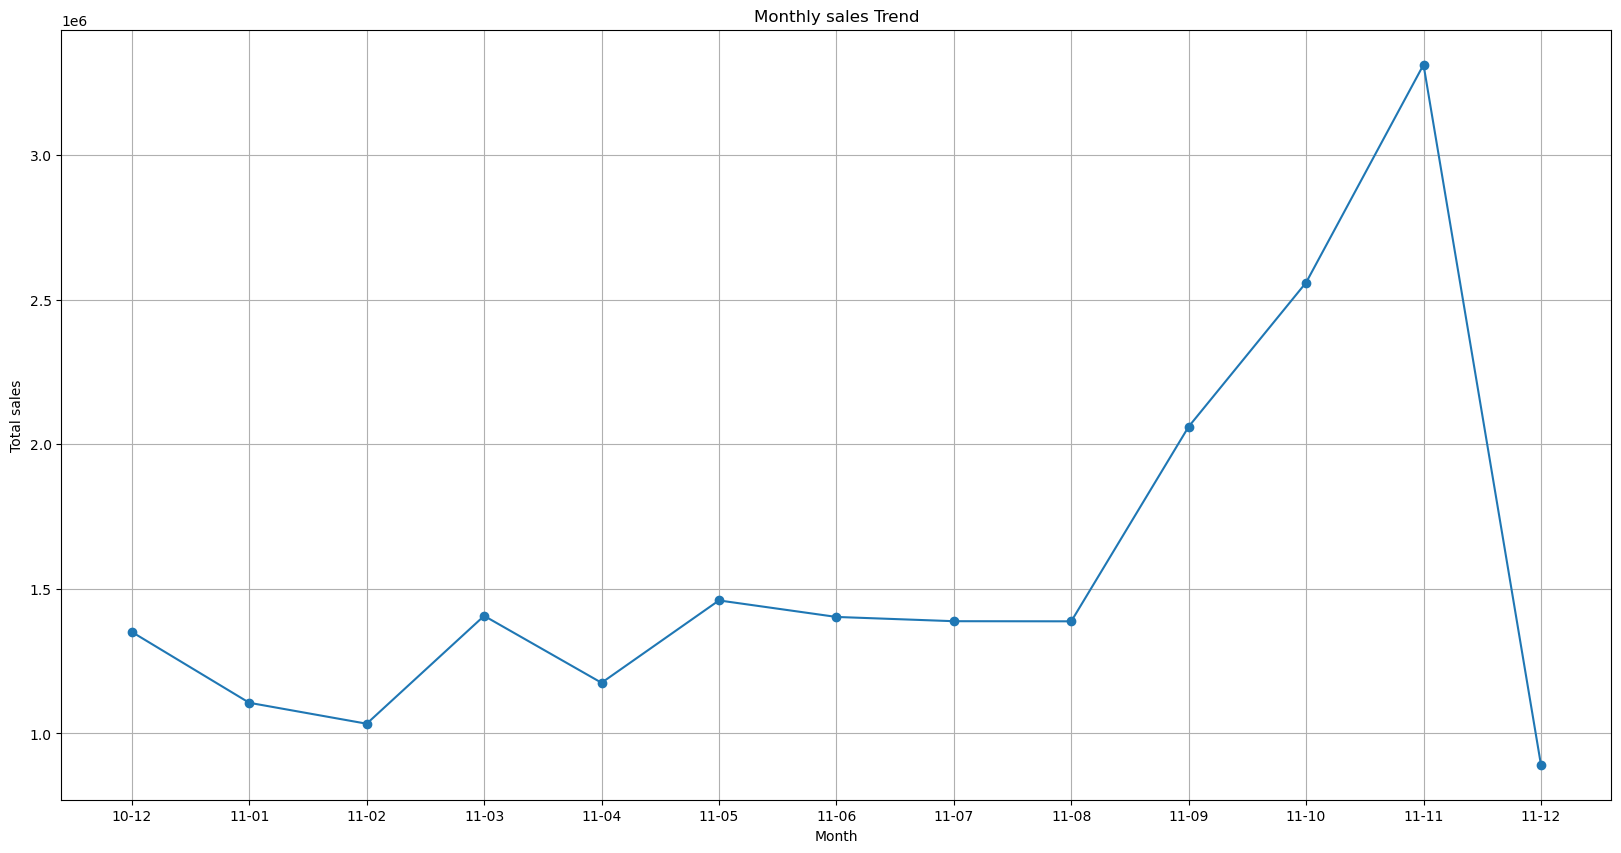

In [374]:
# Sales trend visualization

monthly_sales= df.groupby(df['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()

# Create a line plot
plt.figure(figsize=(20,10))
plt.plot(monthly_sales.index.strftime('%y-%m'), monthly_sales.values, marker= 'o', linestyle= '-')
plt.xlabel('Month')
plt.ylabel('Total sales')
plt.title('Monthly sales Trend')
plt.grid(True)
plt.show()

## Cohort Analysis

In [377]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [379]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [381]:
df['InvoiceDate']= df['InvoiceDate'].apply(get_month)

In [382]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda


In [383]:
def get_cohort_date(df):
    df['cohort date']= df.groupby('CustomerID')['InvoiceDate'].transform('min')
    return df['cohort date']

In [387]:
df['cohort date']= get_cohort_date(df)

In [389]:
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01


## Cohort Index

In [392]:
def get_year_month(df, col):

    month= df[col].dt.month
    year= df[col].dt.year
    return month, year

In [394]:
first_month, first_year= get_year_month(df, 'cohort date')

In [396]:
first_month

0         12
1         12
2         12
3         12
4         12
          ..
541904     8
541905     8
541906     8
541907     8
541908     8
Name: cohort date, Length: 406829, dtype: int32

In [398]:
first_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: cohort date, Length: 406829, dtype: int32

In [400]:
latest_month, latest_year= get_year_month(df, 'InvoiceDate')

In [402]:
latest_month

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 406829, dtype: int32

In [404]:
latest_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: InvoiceDate, Length: 406829, dtype: int32

In [406]:
# Cohort Index

def create_cohort_index(first_month, first_year, latest_month, latest_year):
    year_diff= latest_year-first_year
    month_diff= latest_month-first_month
    index= year_diff*12 + month_diff + 1
    return index

In [408]:
df['cohort_index']= create_cohort_index(first_month, first_year, latest_month, latest_year)

In [410]:
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date,cohort_index
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,1
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,1
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,1
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,1
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01,5
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01,5
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01,5
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01,5


## Cohort Table

In [413]:
cohort_info= df.groupby(['cohort date', 'cohort_index'])['CustomerID'].nunique().reset_index()

In [415]:
cohort_info

,cohort date,cohort_index,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [417]:
cohort_info.rename(columns={'CustomerID' : 'Number of customers'}, inplace= True)


In [419]:
cohort_info

,cohort date,cohort_index,Number of customers
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [421]:
cohort_table= cohort_info.pivot(index= 'cohort date', columns= ['cohort_index'], values= 'Number of customers')

In [423]:
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [425]:
cohort_table.index= cohort_table.index.strftime('%B %Y')
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
January 2011,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
February 2011,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
March 2011,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
April 2011,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
May 2011,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
June 2011,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort date'>

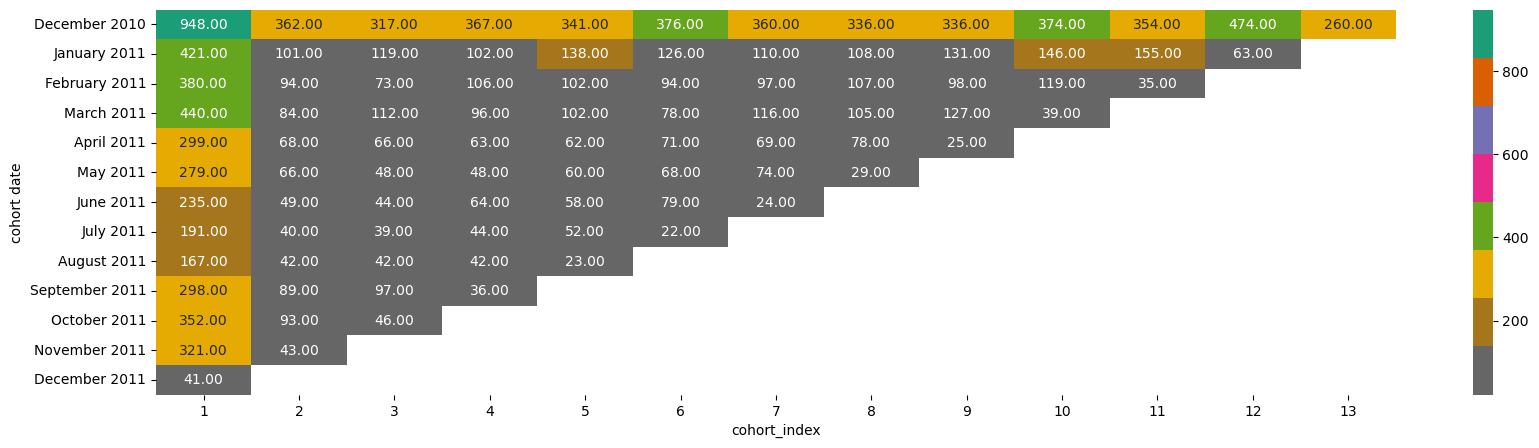

In [427]:
plt.figure(figsize=(20,5))
sns.heatmap(cohort_table, annot= True, cmap= 'Dark2_r', fmt='.2f')

In [429]:
new_cohort_table= cohort_table.divide(cohort_table.iloc[:,0],axis= 0)
new_cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
January 2011,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
February 2011,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
March 2011,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
April 2011,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
May 2011,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort date'>

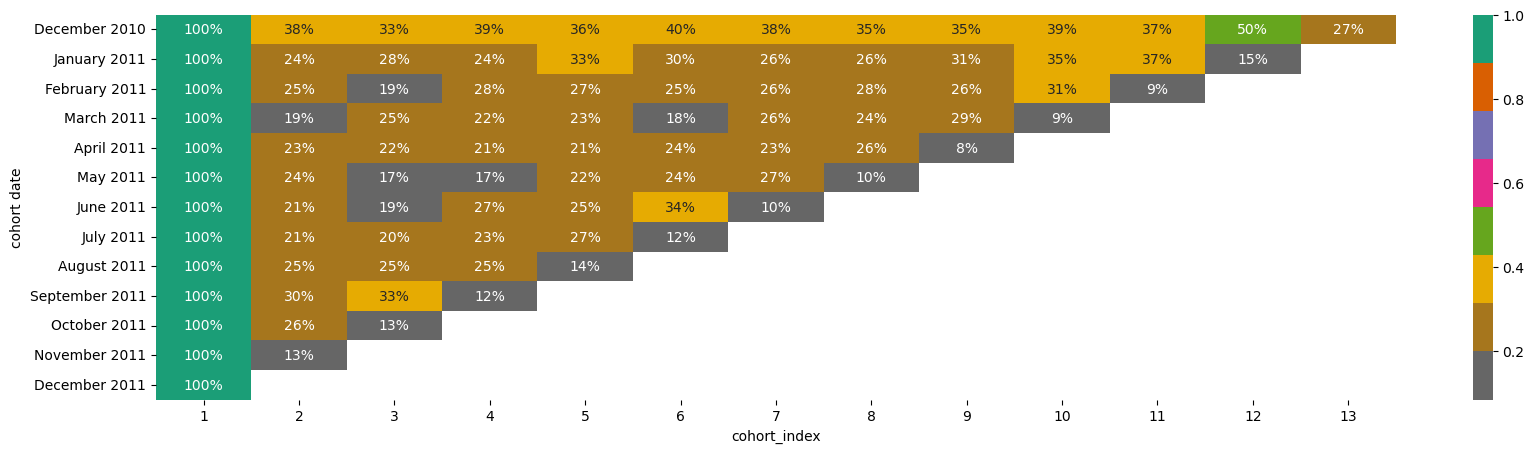

In [431]:
plt.figure(figsize=(20,5))
sns.heatmap(new_cohort_table, annot= True, cmap= 'Dark2_r', fmt='.0%')

Quantity bought by each cohort

In [434]:
quantity_bought= df.groupby(['cohort date', 'cohort_index'])['Quantity'].sum().reset_index()

In [436]:
quantity_bought

,cohort date,cohort_index,Quantity
0,2010-12-01,1,1350834
1,2010-12-01,2,546873
2,2010-12-01,3,462374
3,2010-12-01,4,613244
4,2010-12-01,5,510943
...,...,...,...
86,2011-10-01,2,181888
87,2011-10-01,3,44776
88,2011-11-01,1,574330
89,2011-11-01,2,56021


In [438]:
quantity_table= quantity_bought.pivot(index= 'cohort date', columns= ['cohort_index'],values= 'Quantity')
quantity_table.index= quantity_table.index.strftime('%B %Y')
quantity_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,1350834.0,546873.0,462374.0,613244.0,510943.0,636443.0,597676.0,604504.0,600481.0,757806.0,725896.0,1165046.0,375469.0
January 2011,559013.0,121074.0,155931.0,120023.0,194675.0,166585.0,144835.0,149848.0,200661.0,258400.0,330607.0,76504.0,NaN
February 2011,450020.0,74008.0,98850.0,122918.0,111386.0,104214.0,108442.0,135276.0,151180.0,145405.0,21787.0,NaN,NaN
March 2011,563434.0,74215.0,125519.0,119480.0,122078.0,107554.0,139852.0,182259.0,212009.0,49685.0,NaN,NaN,NaN
April 2011,371021.0,71541.0,66410.0,65115.0,70639.0,105065.0,97319.0,110572.0,27119.0,NaN,NaN,NaN,NaN
May 2011,308885.0,55453.0,44637.0,45690.0,76473.0,118534.0,97156.0,41183.0,NaN,NaN,NaN,NaN,NaN
June 2011,285867.0,47847.0,35516.0,76483.0,88504.0,127400.0,31264.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,254889.0,25983.0,68721.0,69466.0,91529.0,26831.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,243542.0,80156.0,144849.0,141888.0,45405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort date'>

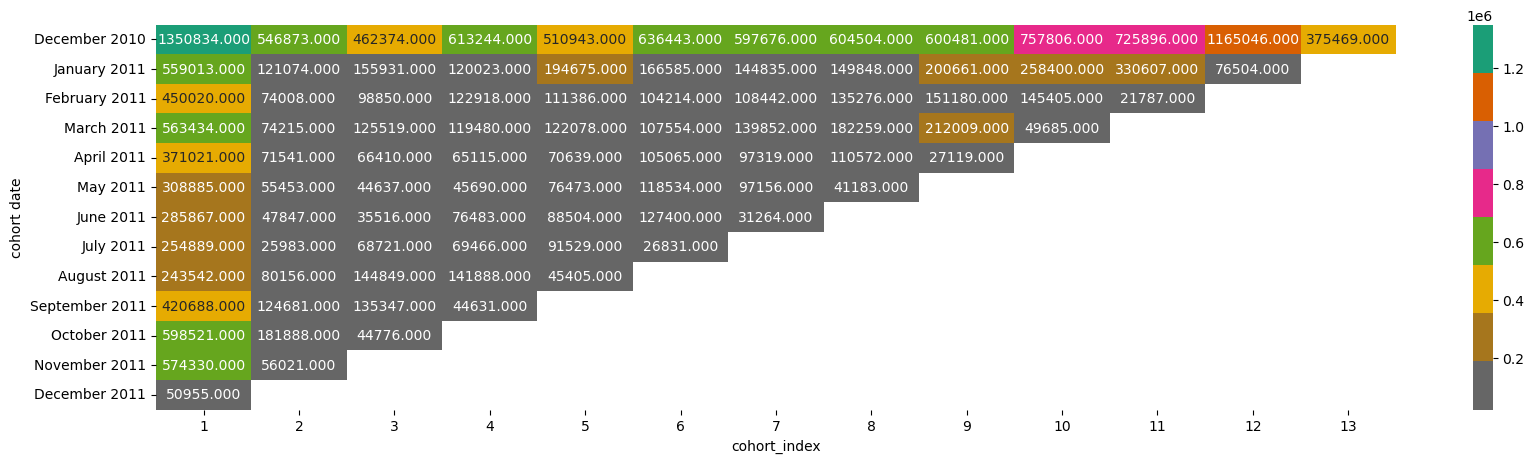

In [440]:
plt.figure(figsize=(20,5))
sns.heatmap(quantity_table, annot= True, cmap= 'Dark2_r', fmt='.3f')

## Creating customer-level features
### Aggregating customer data to extract relevant features for segmentation:

In [443]:
customer_df = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Number of unique purchases
    'Quantity': 'sum',       # Total quantity purchased
    'UnitPrice': 'mean',     # Average purchase price
    'InvoiceDate': ['min', 'max'],  # First & last purchase date
})

# Rename columns
customer_df.columns = ['TotalOrders', 'TotalQuantity', 'AvgUnitPrice', 'FirstPurchase', 'LastPurchase']


In [445]:
customer_df

,TotalOrders,TotalQuantity,AvgUnitPrice,FirstPurchase,LastPurchase
CustomerID,,,,,
12346.0,2,119,50.945000,2011-01-01,2011-01-01
12347.0,7,8511,49.460659,2010-12-01,2011-12-01
12348.0,4,1539,55.091613,2010-12-01,2011-09-01
12349.0,1,3434,53.135342,2011-11-01,2011-11-01
12350.0,1,917,53.750000,2011-02-01,2011-02-01
...,...,...,...,...,...
18280.0,1,495,46.134000,2011-03-01,2011-03-01
18281.0,1,379,59.127143,2011-06-01,2011-06-01
18282.0,3,786,40.731538,2011-08-01,2011-12-01


## Calculate Recency, Frequency, and Monetary Value (RFM)

In [448]:
from datetime import datetime

# Define the current date for recency calculation
current_date = df['InvoiceDate'].max()

customer_df['Recency'] = (current_date - customer_df['LastPurchase']).dt.days
customer_df['Frequency'] = customer_df['TotalOrders']
customer_df['Monetary'] = customer_df['TotalQuantity'] * customer_df['AvgUnitPrice']
customer_df = customer_df[['Recency', 'Frequency', 'Monetary']]


In [484]:
customer_df

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,334,2,6.062455e+03,1
12347.0,0,7,4.209597e+05,0
12348.0,91,4,8.478599e+04,0
12349.0,30,1,1.824668e+05,0
12350.0,303,1,4.928875e+04,1
...,...,...,...,...
18280.0,275,1,2.283633e+04,1
18281.0,183,1,2.240919e+04,1
18282.0,0,3,3.201499e+04,0


## Applying Clustering Algorithm

### 1. Normalizing the Data (Feature Scaling)



In [451]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_df)


### 2. Using  K-Means Algorithm

In [454]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow Method
import matplotlib.pyplot as plt

distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    distortions.append(kmeans.inertia_)



C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

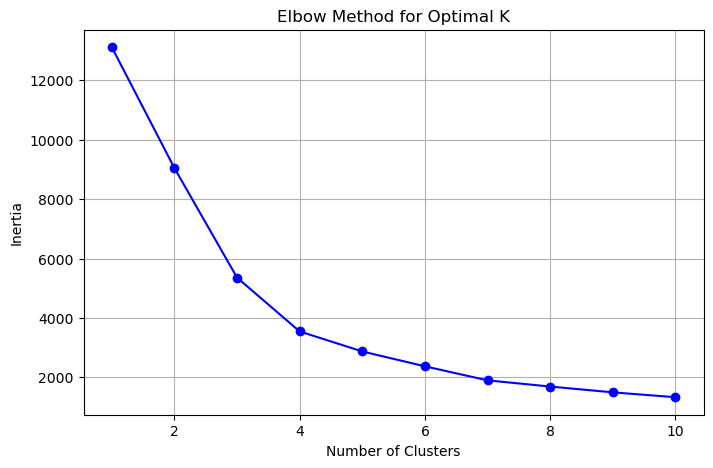

In [458]:
# Plotting the elbow curve
plt.figure(figsize=(8,5))
plt.plot(K, distortions, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


### 3. Training the Model with Optimal K

In [461]:
kmeans = KMeans(n_clusters=4, random_state=42)  # Choose optimal K based on the elbow method
customer_df['Cluster'] = kmeans.fit_predict(scaled_data)


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Temp\ipykernel_8976\3507295515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['Cluster'] = kmeans.fit_predict(scaled_data)


### Interpreting the Clusters

In [464]:
# Analyzing cluster characteristics

cluster_summary = customer_df.groupby('Cluster').mean()#.round(3)
print(cluster_summary)


            Recency   Frequency      Monetary
Cluster                                      
0         46.650153    4.203936  1.973826e+05
1        247.158854    1.850694  7.189796e+04
2          0.000000  153.500000  1.230077e+07
3         13.857678   25.273408  1.117204e+06


### Visualizing Clusters

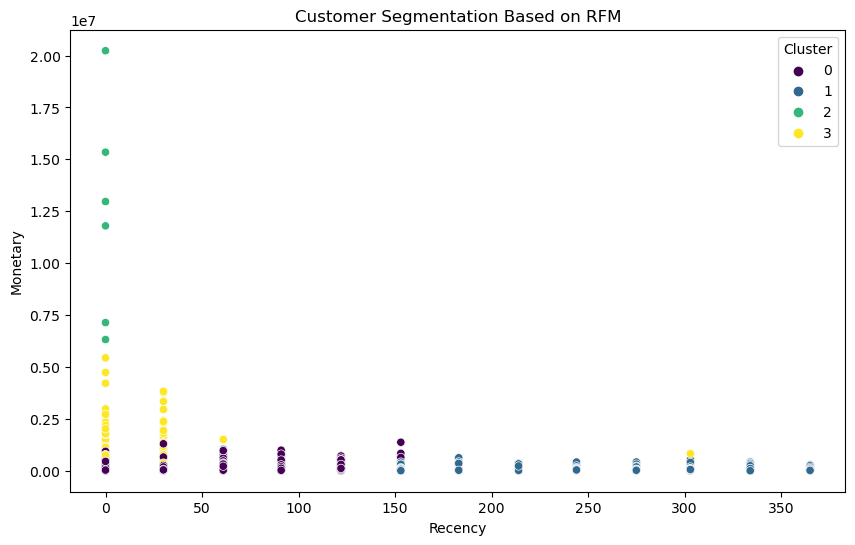

In [467]:
# import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x=customer_df['Recency'], y=customer_df['Monetary'], hue=customer_df['Cluster'], palette='viridis')
plt.title('Customer Segmentation Based on RFM')
plt.show()


### Segment Definitions:

#### Cluster 0: High Recency, Low Frequency → New Customers
#### Cluster 1: Low Recency, High Frequency, High Monetary → Loyal Customers
#### Cluster 2: Medium Recency, Medium Frequency → Regular Buyers
#### Cluster 3: High Recency, Low Frequency → Churned Customers

## Actionable Strategies:

Loyal Customers: Provide rewards, early access to sales.

Churned Customers: Send re-engagement offers or personalized emails.

New Customers: Guide them with onboarding and recommendations.

## Using DBSCAN for the Clusters

In [532]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN




In [536]:

df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Aggregate data at customer level
customer_data = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (pd.Timestamp.now() - pd.to_datetime(x.max())).days,
    'InvoiceNo': 'count',
    'TotalAmount': 'sum'
}).reset_index()

customer_data.columns = ['CustomerID', 'Recency', 'Frequency', 'MonetaryValue']

In [538]:
customer_data

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,5138,2,5342.40
1,12347.0,4804,182,431501.00
2,12348.0,4895,31,82378.47
3,12349.0,4834,73,176075.12
4,12350.0,5107,17,48173.37
...,...,...,...,...
4367,18280.0,5079,10,18907.36
4368,18281.0,4987,7,26009.01
4369,18282.0,4804,13,36010.74
4370,18283.0,4804,756,2008747.62


In [540]:
# feature Scaling
# Scaling the features to ensure they contribute equally to the clustering process.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[['Recency', 'Frequency', 'MonetaryValue']])


C:\Users\User\AppData\Local\Temp\ipykernel_8976\392048281.py:40: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


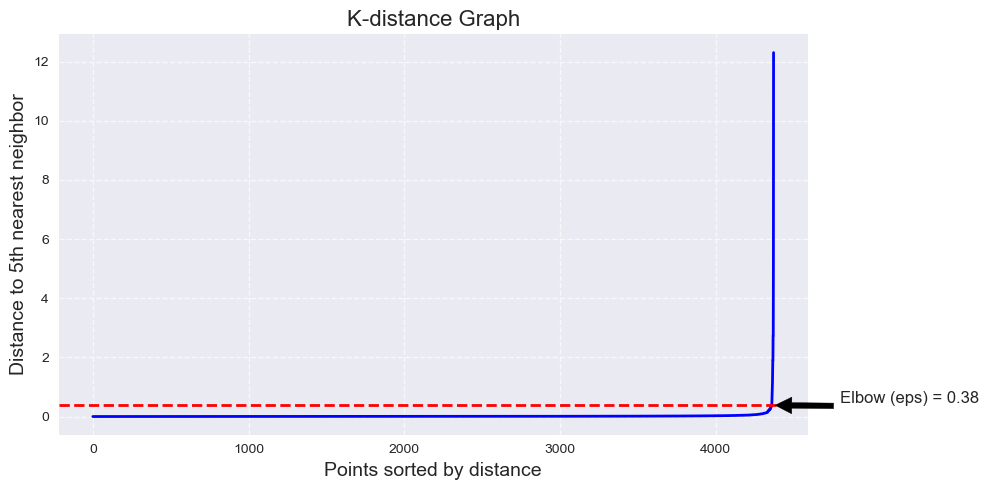

The suggested eps value is: 0.38


In [572]:
# Calculating distances to the k nearest neighbors
# k-distnce helps to determine the eps parameter in DBSCAN which represents the maximum distance between two samples for them to be considered as part of the same neighborhood

from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

# Calculating distances to the k nearest neighbors
k = 5
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(scaled_features)
distances, indices = nbrs.kneighbors(scaled_features)

# Sorting the distances
distances = np.sort(distances, axis=0)
distances = distances[:,1]  # Get the distance to the kth nearest neighbor

# Finding the elbow point
kneedle = KneeLocator(range(len(distances)), distances, S=1.0, curve='convex', direction='increasing')
elbow = distances[kneedle.elbow]

# Creating the enhanced k-distance graph
plt.figure(figsize=(10, 5))
plt.plot(distances, linewidth=2, color='blue')
plt.axhline(y=elbow, color='r', linestyle='--', linewidth=2)
plt.xlabel('Points sorted by distance', fontsize=14)
plt.ylabel(f'Distance to {k}th nearest neighbor', fontsize=14)
plt.title('K-distance Graph', fontsize=16)

# Annotating the elbow point
plt.annotate(f'Elbow (eps) = {elbow:.2f}', 
             xy=(kneedle.elbow, elbow), 
             xytext=(kneedle.elbow+len(distances)//10, elbow*1.2),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12)

# Adding grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Enhancing overall appearance
plt.style.use('seaborn')
plt.tight_layout()

plt.show()

print(f"The suggested eps value is: {elbow:.2f}")


In [550]:
# Applying dbscan
dbscan = DBSCAN(eps=0.38, min_samples=5)
customer_data['Cluster'] = dbscan.fit_predict(scaled_features)


In [552]:
customer_data

,CustomerID,Recency,Frequency,MonetaryValue,Cluster
0,12346.0,5138,2,5342.40,0
1,12347.0,4804,182,431501.00,0
2,12348.0,4895,31,82378.47,0
3,12349.0,4834,73,176075.12,0
4,12350.0,5107,17,48173.37,0
...,...,...,...,...,...
4367,18280.0,5079,10,18907.36,0
4368,18281.0,4987,7,26009.01,0
4369,18282.0,4804,13,36010.74,0
4370,18283.0,4804,756,2008747.62,0


In [554]:
# Analysing the Clusters
cluster_summary = customer_data.groupby('Cluster').agg({
    'CustomerID': 'count',
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean'
})
print(cluster_summary)


         CustomerID      Recency    Frequency  MonetaryValue
Cluster                                                     
-1               23  4834.260870  2140.130435   5.472848e+06
 0             4342  4901.929295    80.589360   2.054791e+05
 1                7  4804.000000  1098.142857   2.767112e+06


In [558]:
# Visualizing the clusters 
# 1. Prepare the data
features = ['Recency', 'Frequency', 'MonetaryValue']
X = customer_data[features]

# 2. Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Applying PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = customer_data['Cluster']
pca_df


,PC1,PC2,Cluster
0,-1.157308,2.109412,0
1,0.740564,-0.795536,0
2,-0.342615,-0.160686,0
3,0.048949,-0.678796,0
4,-0.982404,1.839447,0
...,...,...,...
4367,-0.962583,1.557382,0
4368,-0.720423,0.679584,0
4369,-0.208378,-1.058076,0
4370,4.231870,0.170428,0


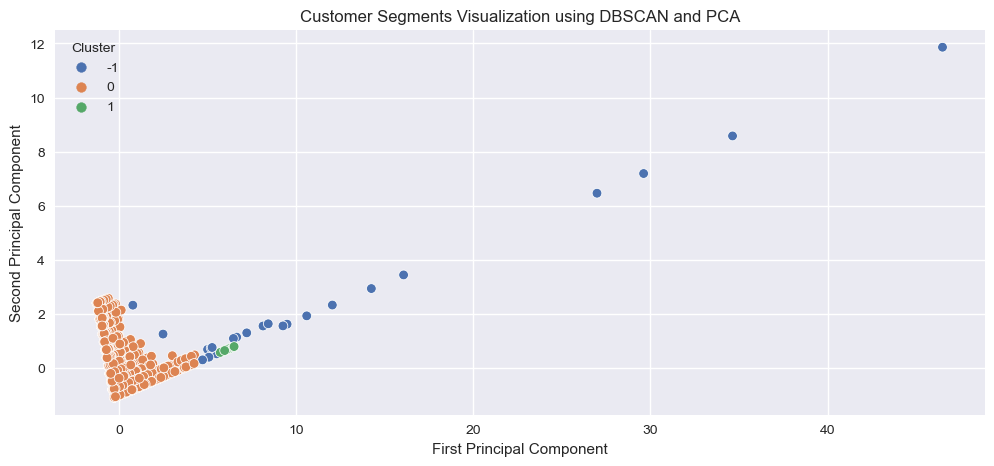

In [585]:
# Visualizing the clusters
plt.figure(figsize=(12, 5))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='deep', legend='full')
plt.title('Customer Segments Visualization using DBSCAN and PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


## Definition of Segments

### Cluster 0 (High Value Customers):
Customers in this cluster have high frequency and monetary value, with low recency. They are likely loyal customers who make frequent, high-value purchases.

### Cluster 1 (Ocassional Buyers):
This segment might have moderate frequency and monetary value, with higher recency. They purchase occasionally but may need targeted marketing to increase engagement.

### Cluster -1 (Outliers):
This segment represents unique customer behaviors or potential data anomalies

In [562]:
# Print cluster statistics
cluster_stats = customer_data.groupby('Cluster').agg({
    'CustomerID': 'count',
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean'
}).round(2)

print("\nCluster Statistics:")
print(cluster_stats)




Cluster Statistics:
         CustomerID  Recency  Frequency  MonetaryValue
Cluster                                               
-1               23  4834.26    2140.13     5472847.70
 0             4342  4901.93      80.59      205479.14
 1                7  4804.00    1098.14     2767111.67


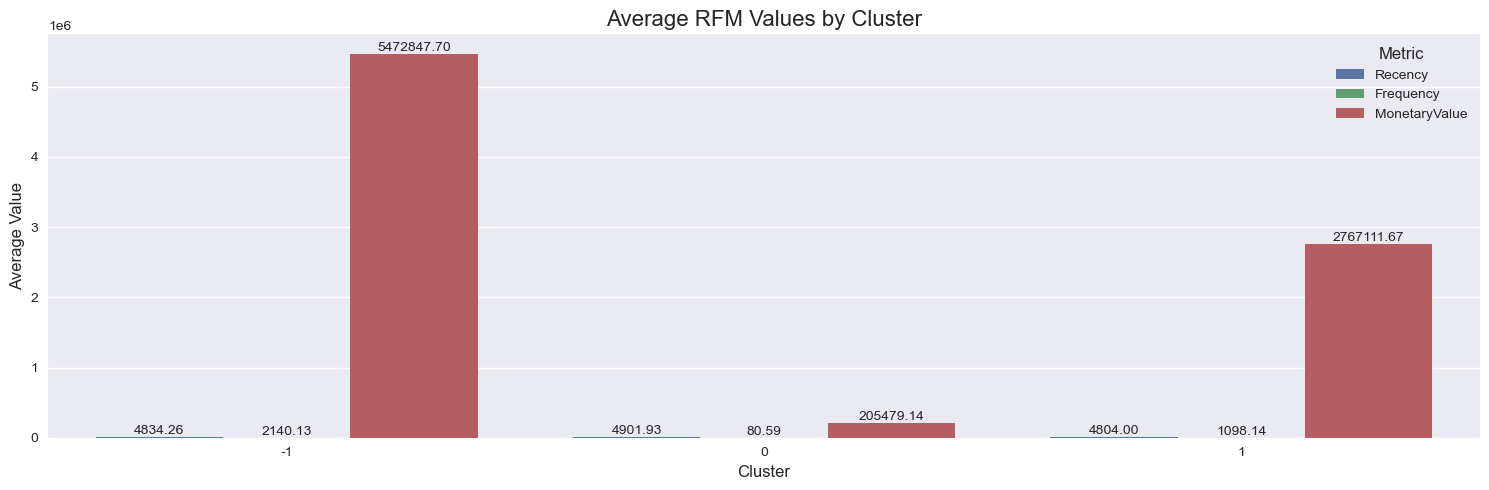


Cluster Sizes:
Cluster
-1      23
 0    4342
 1       7
Name: count, dtype: int64


In [615]:
# Visualizing the clusters in abar chart

# Calculate mean values for each cluster
cluster_means = customer_data.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean'
}).reset_index()

# Melt the DataFrame for easier plotting
melted_data = pd.melt(cluster_means, id_vars=['Cluster'], 
                      value_vars=['Recency', 'Frequency', 'MonetaryValue'],
                      var_name='Metric', value_name='Value')

# Create the bar chart
plt.figure(figsize=(15, 5))
sns.barplot(x='Cluster', y='Value', hue='Metric', data=melted_data)

plt.title('Average RFM Values by Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.legend(title='Metric', title_fontsize='12', fontsize='10')

# Rotate x-axis labels if there are many clusters
plt.xticks(rotation=45 if len(cluster_means) > 5 else 0)

# Add value labels on top of each bar
for i in plt.gca().containers:
    plt.gca().bar_label(i, fmt='%.2f', label_type='edge')

plt.tight_layout()
plt.show()

# Print cluster sizes
cluster_sizes = customer_data['Cluster'].value_counts().sort_index()
print("\nCluster Sizes:")
print(cluster_sizes)


## Observations from the Bar chart, Actionable insights and Business Strategies

### **Explanation of the Bar Chart**  
The chart represents the **average RFM (Recency, Frequency, and Monetary) values per DBSCAN cluster**. The three clusters identified are **Cluster -1, Cluster 0, and Cluster 1**.

- **Cluster -1 (Noise Points / Outliers)**:  
  - Recency: **~4834 days** (very high, meaning these customers have not made recent purchases).  
  - Frequency: **~2140** (moderate transaction frequency).  
  - Monetary Value: **5.47M** (extremely high, indicating they contribute significantly to revenue).  
  - **Interpretation**: These customers are flagged as outliers by DBSCAN, possibly VIPs or businesses that made bulk purchases but have stopped transacting.  
 
- **Cluster 0 (Low-Value Customers)**:  
  - Recency: **~4901 days** (high, meaning they are inactive customers).  
  - Frequency: **~80** (very low, indicating rare transactions).  
  - Monetary Value: **205K** (low overall contribution).  
  - **Interpretation**: These are low-value customers who have made very few purchases and are inactive.  

- **Cluster 1 (High-Value, Active Customers)**:  
  - Recency: **~4804 days** (slightly high but lower than others).  
  - Frequency: **~1098** (moderate transaction frequency).  
  - Monetary Value: **2.76M** (high contribution to revenue).  
  - **Interpretation**: These customers are likely the core segment, purchasing regularly and generating significant revenue.  

---

### **Actionable Insights & Business Strategies**
#### **1. Retain High-Value Customers (Cluster 1)**
- Offer **exclusive discounts, personalized promotions, and loyalty programs** to encourage repeat purchases.
- Provide a **subscription model or membership benefits** to keep them engaged.
- Use targeted email marketing with **new product recommendations**.

#### **2. Reactivate Dormant High-Spending Customers (Cluster -1)**
- **Win-back campaigns**: Special offers for customers who haven't purchased in a while.
- **Understand their drop-off reasons**: Conduct surveys to gather insights.
- **Leverage customer support**: Offer dedicated account managers for bulk buyers.

#### **3. Increase Engagement of Low-Value Customers (Cluster 0)**
- **Encourage small frequent purchases** with lower minimum order values or installment payment plans.
- **Social media and referral marketing**: Give incentives for referring new customers.
- **Optimize product recommendations**: Use AI-driven recommending these clusters for deeper insights?